<a href="https://www.kaggle.com/redomy/data-visualization-plotly-seaborn-and-wordcloud?scriptVersionId=89440744" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv
/kaggle/input/4882car/4881.png


In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px


import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"/kaggle/input/usa-cers-dataset/USA_cars_datasets.csv", index_col=0)
df.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of brands in this dataset such as {}... \n".format(len(df.brand.unique()),
                                                                           ", ".join(df.brand.unique()[0:5])))

print("There are {} states  in this dataset such as {}... \n".format(len(df.state.unique()),
                                                                                      ", ".join(df.state.unique()[0:5])))

There are 2499 observations and 12 features in this dataset. 

There are 28 types of brands in this dataset such as toyota, ford, dodge, chevrolet, gmc... 

There are 44 states  in this dataset such as new jersey, tennessee, georgia, virginia, florida... 



In [5]:
cars = pd.DataFrame()
cars["occ"] = df['brand'].value_counts()
brands = dict(zip(cars.index, cars['occ'].tolist()))


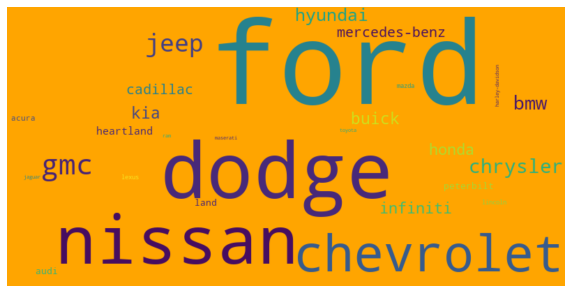

"The size of each brand is relevant to it's occurence in the database"

In [6]:
wc = WordCloud(background_color='orange',width=800, height=400, max_words=200).generate_from_frequencies(brands)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

"""The size of each brand is relevant to it's occurence in the database"""

'As we see, the brands that are most present in the dataset are: Ford,dodge, nissan, chevrolet and GMC, \nthis is very normal since this dataset was collected in the united states where these brands are the most dominant.'

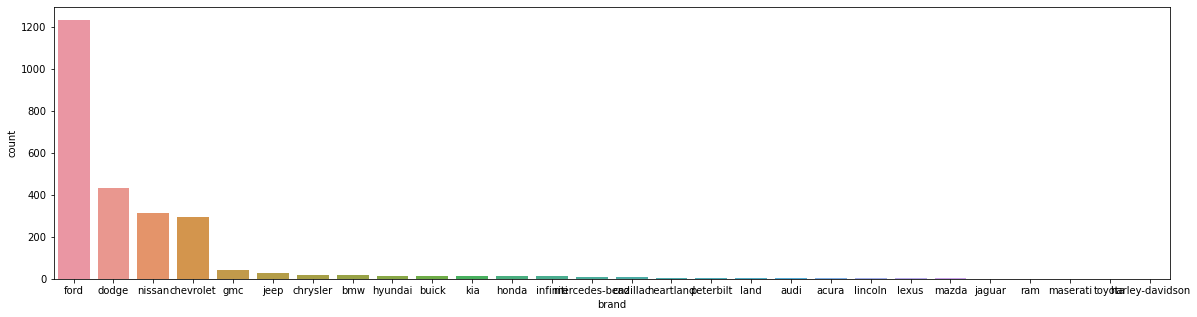

In [7]:
plt.figure(figsize=(20,5))
sns.countplot(x='brand', data=df, order = df['brand'].value_counts().index)

"""As we see, the brands that are most present in the dataset are: Ford,dodge, nissan, chevrolet and GMC, 
this is very normal since this dataset was collected in the united states where these brands are the most dominant."""

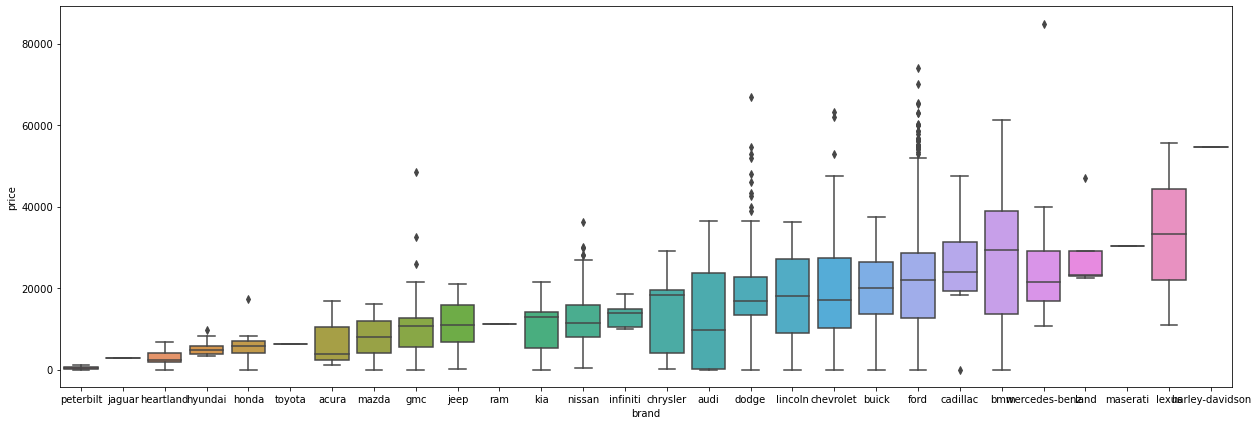

In [8]:
plt.figure(figsize=(21,7))
sns.boxplot(df['brand'],df['price'],order=df.groupby(df['brand']).mean().sort_values(by='price').index)

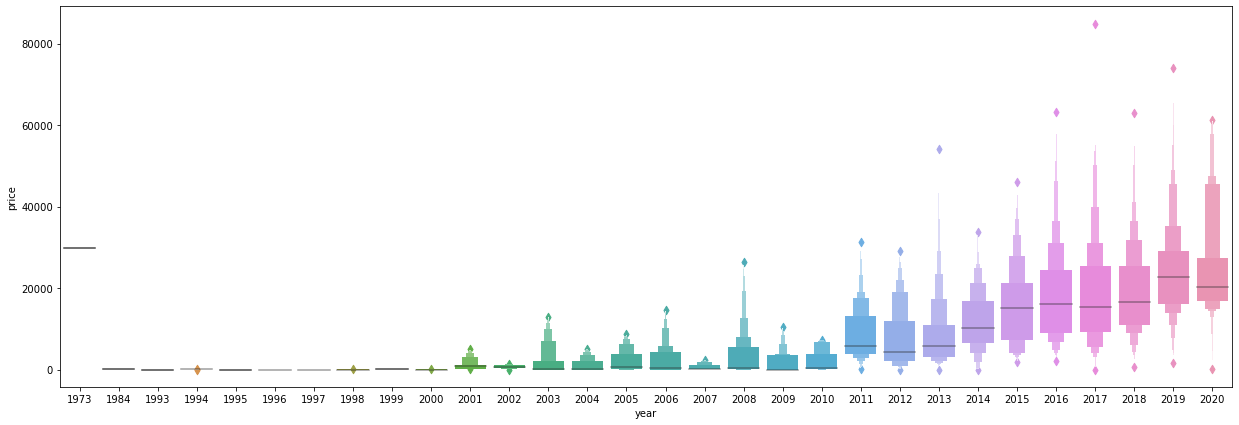

In [9]:
plt.figure(figsize=(21,7))
sns.boxenplot(df['year'],df['price'])

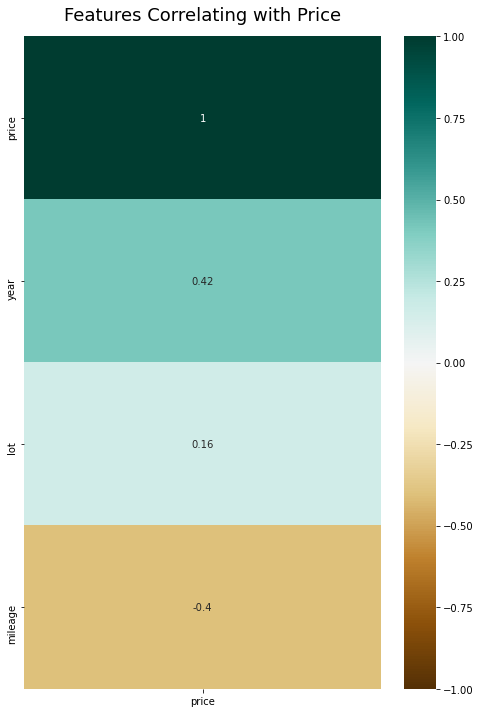

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);


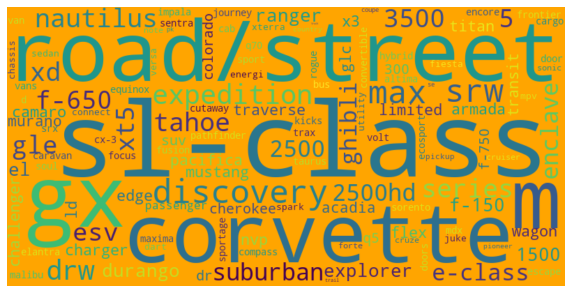

'The size of each model depends on the price of each car, we remark that the highest average \nprice goes for cars like sl-class, corvette, Discovery,Gx, and road/street  models.'

In [11]:
cars = pd.DataFrame()
cars = df[['price','model']]
frame = cars.groupby('model').mean()


models = dict(zip(frame.index, frame['price'].tolist()))


wc = WordCloud(background_color='orange',width=800, height=400, max_words=200).generate_from_frequencies(models)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

"""The size of each model depends on the price of each car, we remark that the highest average 
price goes for cars like sl-class, corvette, Discovery,Gx, and road/street  models."""

In [12]:
frame['model'] = frame.index

fig = px.treemap(frame,path =['model'],values = 'price',title='Tree of Most Common Words')
fig.show()

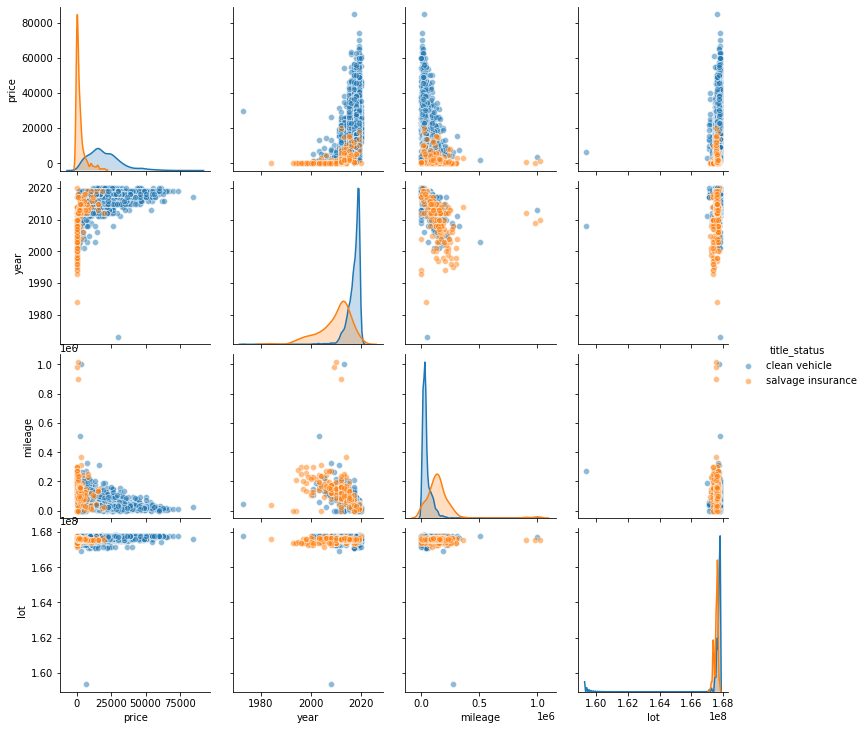

In [13]:
sns.pairplot(df,hue ='title_status',plot_kws={'alpha':0.5})

In [14]:

dff = df[['price','year','model']]
fig = px.scatter(dff, x="year", y="price", color="model",
                 size='price')
fig.show()

In [15]:

dff = df[['price','year','model','brand']]
dff = dff[dff['year']>2010]
fig = px.scatter(dff, x="year", y="price", color="model",
                 size='price',hover_data=['brand'])
fig.show()